# The multiindex pandas array

## Simulation trajectories as Pandas Array

We can access the full trajectories of the particles, which are stored as a multiindex `pandas` array in the `trj` attribute. To access it, we can simply write 
    
    col.trj
    
Below we use the method `head()`, which prints only the first few rows of a pandas array. This is useful to visualize the structure of an array. 

In [12]:
col.trj.head()

type    x      y    z    t
frame id                           
0     1     1  0.0   10.0  0.1  0.0
      2     1  0.0   40.0  0.1  0.0
      3     1  0.0   80.0  0.1  0.0
      4     1  0.0  100.0  0.1  0.0
      5     1  0.0  140.0  0.1  0.0

## The multiindex pandas array

The multiindex structure is a little complicated to access at first, but it allows a lot of flexibility when slicing sections of the array. It is also the natural structure for a system of many particles and many frames. Here we show how to easily slice sections of the array. 

The first step is to define an IndexSlice object from the pandas module.

In [13]:
import pandas as pd
idx = pd.IndexSlice

Then, if for example we want to access the tenth frame we write:

In [14]:
col.trj.loc[idx[10,:],:].head()

type         x           y         z     t
frame id                                           
10    1     1 -0.468097   10.064100 -2.040800  10.0
      2     1 -0.360151   39.982700  0.059208  10.0
      3     1 -0.593120   79.935204 -0.847668  10.0
      4     1 -0.611551  100.082001  2.285720  10.0
      5     1 -0.560954  139.925003 -0.455050  10.0

and we can plot the points by writing:

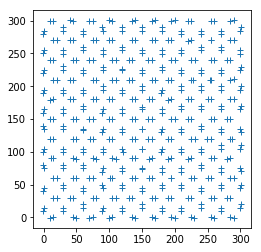

In [15]:
plt.plot(col.trj.loc[idx[10,:],"x"],col.trj.loc[idx[10,:],"y"],'+')
plt.axis("square");

### The type column

The simulation program defines traps as a type of atom. Therefore, in the resulting array, we see two atoms per `colloidal_ice` element, which are distinguished by their `type`, as can be seen in the previous image. To access only the atoms, we can use the nice logical indexing features of the pandas array.

In [16]:
trj_particle = col.trj[col.trj.type==1]
trj_particle.head()

type    x      y    z    t
frame id                           
0     1     1  0.0   10.0  0.1  0.0
      2     1  0.0   40.0  0.1  0.0
      3     1  0.0   80.0  0.1  0.0
      4     1  0.0  100.0  0.1  0.0
      5     1  0.0  140.0  0.1  0.0

And we can plot the points by writing, as before:

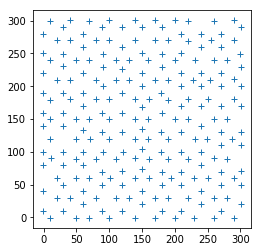

In [17]:
plt.plot(trj_particle.loc[idx[10,:],"x"],trj_particle.loc[idx[10,:],"y"],'+')
plt.axis("square");

### Drawing whole trajectories
We can plot the trajectories of the particles by writing:

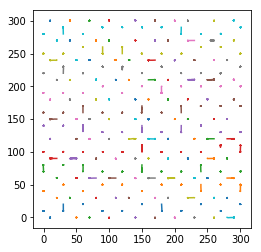

In [18]:
for i in trj_particle.index.get_level_values("id").unique():
    plt.plot(trj_particle.loc[idx[:,i],"x"],trj_particle.loc[idx[:,i],"y"])
plt.axis("square");